<a href="https://colab.research.google.com/github/rvaldivia95/DecisionTree-Kaggle-Spotify/blob/master/DecisionTree_Kaggle_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [47]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [48]:
!cp kaggle.json ../root/.kaggle
# Downlaod data for the nyc_taxi_trip_duration challenge
!kaggle datasets download -d geomack/spotifyclassification

spotifyclassification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
data = pd.read_csv('spotifyclassification.zip', compression='zip', header=0, sep=',', quotechar='"')

In [50]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [51]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [0]:
#split data: train set and training set
train, test = train_test_split(data, test_size = 0.15)

In [54]:
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 1714; Test size: 303


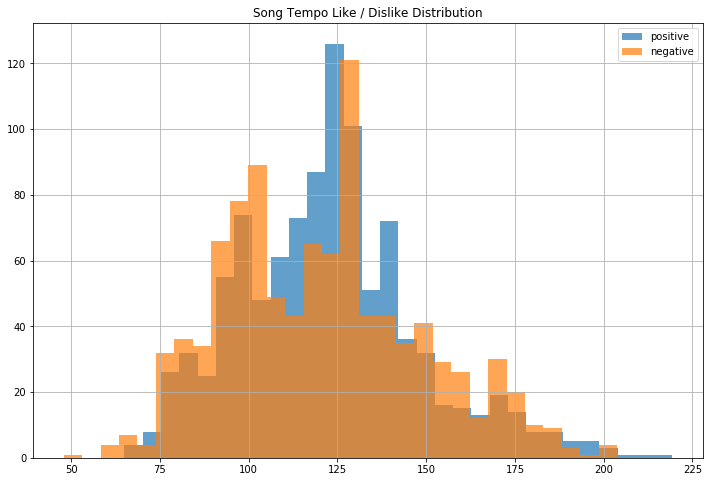

In [56]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']

pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']

pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']

pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']

pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']

pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']

pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

fig = plt.figure(figsize = (12,8))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7 , bins = 30, label ="positive")
neg_tempo.hist(alpha = 0.7 , bins = 30, label ="negative")
plt.legend(loc = "upper right")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cu

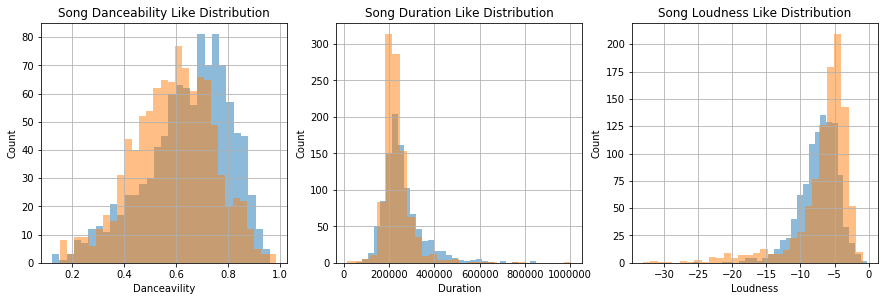

In [57]:
fig2 = plt.figure(figsize = (15,15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceavility')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')

pos_dance.hist(alpha = 0.5, bins=30)

ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)

#Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')

pos_duration.hist(alpha = 0.5, bins=30)

ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)

#Loudness
ax6 = fig2.add_subplot(333)
ax6.set_xlabel('Loudness')
ax6.set_ylabel('Count')
ax6.set_title('Song Loudness Like Distribution')

pos_loudness.hist(alpha = 0.5, bins=30)

ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)



In [0]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [0]:
features = ["danceability", "loudness", "valence", "energy", "instrumentalness","acousticness","key","instrumentalness"]

In [0]:
X_train = train[features]
Y_train= train["target"]

X_test = train[features]
Y_test= train["target"]

In [0]:
dt = c.fit(X_train, Y_train)

In [0]:
def show_tree(tree, features, path):
  f = io.StringIO()
  export_graphviz(tree, out_file=f, feature_names=features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = plt.imread(path)
  plt.rcParams["figure.figsize"] = [20, 20]
  plt.imshow(img)


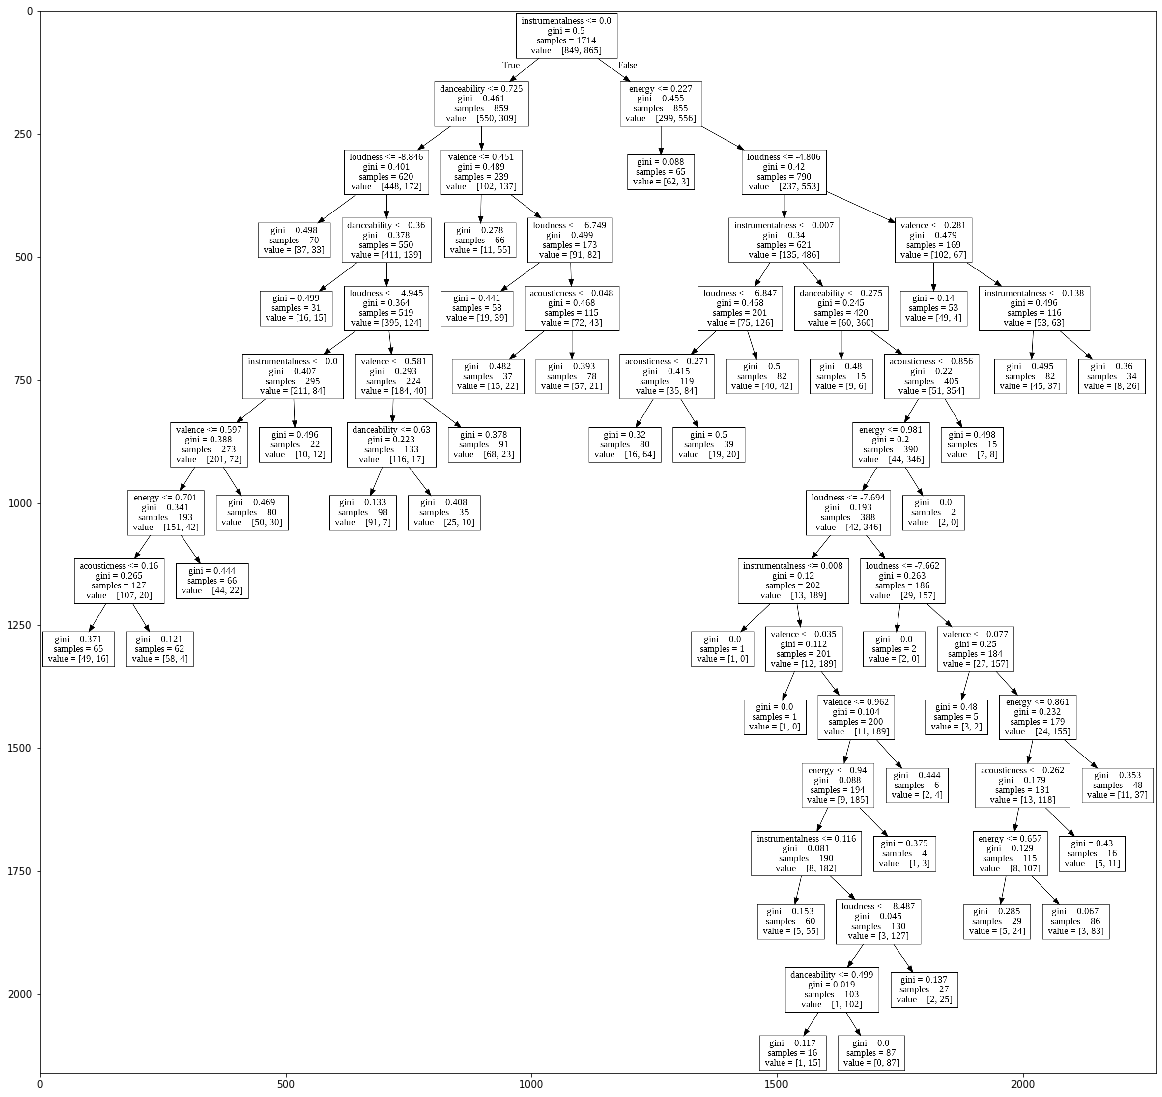

In [69]:
show_tree(dt,features,'dec_tree_01.png')

In [0]:
y_pred = c.predict(X_test)

In [72]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [0]:
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test, y_pred) * 100

In [76]:
print(" Accuracy using Decision Tree: ", round(score, 1), "%")

 Accuracy using Decision Tree:  75.9 %
